RUN THIS NOTEBOOK IN COLLAB and SELECT GPU and TPU please!

# Install Requirements

In [1]:
# import subprocess

# # read the requirements.txt file
# with open('requirements.txt') as f:
#     requirements = f.read().splitlines()

# # loop through the requirements and install them if not already installed
# for requirement in requirements:
#     try:
#         __import__(requirement)
#     except ImportError:
#         subprocess.check_call(['pip', 'install', requirement])
!pip install transformers sentencepiece


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.0 MB/s eta 0:00:00


# Load Data

In [2]:
import pandas as pd
import numpy as np

In [ ]:
# Need to upload csv first to run this line
# df = pd.read_csv('master_data.csv')

In [3]:
# alternatively directly read it from colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/Seeded/Prod Data/master_data.csv') # if you try to run this and it doesn't work, change your path

<ipython-input-4-09fb0ecfef70>:1: DtypeWarning: Columns (38,40,46,60,63,64,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/Seeded/Prod Data/master_data.csv')


# Preprocessing

## Select Relevant Columns

In [5]:
# select only relevant columns
relevant_columns = ['product_name', 'product_description', 'product_feature', 'color', 'material', 'style']
df = df[relevant_columns]
df.head()

,product_name,product_description,product_feature,color,material,style
0,Arlo Toddler Bed Rail,NaN,NaN,NaN,NaN,NaN
1,Kids Arlo White and Gold Nightstand,"Every bed needs a sidekick, and the Kids Arlo ...",Brushed metal gold capped feet<br>Painted whit...,NaN,NaN,NaN
2,Kids Wren Carved Nightstand,The intricate wood carved designs on the front...,Intricate wood carved design on front panel<br...,NaN,NaN,NaN
3,Kids Bodie Wood Nightstand,"Simple and clean, our Bodie Nightstand is a ti...","A Bill Eastburn design<br>Rubberwood, oak vene...",Natural,NaN,NaN
4,Kids Bodie Blue Nightstand,"Simple and clean, our Bodie Nightstand is a ti...","A Bill Eastburn design<br>Rubberwood, low emis...",NaN,NaN,NaN


## Filter to rows with valid labels

In [6]:
df_filtered = df.dropna()
print(df_filtered.shape)
df_filtered.head()

(1485, 6)


,product_name,product_description,product_feature,color,material,style
105,Knurl Nesting Coffee Tables Set of Two,This space-saving design mixes hard-working me...,Handcrafted<br>Cast-aluminum tops<br>Large top...,"Black,Brown",[],Industrial
237,Knurl Small Accent Table,This space-saving design mixes hard-working me...,Handcrafted<br>Cast-aluminum top with antiqued...,Gray,[],Industrial
395,Dunewood Whitewashed Dining Bench,Employing the time-honored technique of parque...,Designed by Blake Tovin of Tovin Design<br>Han...,White,[],Contemporary
399,"Basque Grey Wash 48"" Bench",Stained light brown and finished with a grey w...,Sustainable solid mango wood<br>Grey wash over...,"Brown,Gray",[],Country & Farmhouse
409,"Basque Grey Wash 84"" Bench",Handcrafted entirely of sustainable solid mang...,Sustainable solid mango wood<br>Grey wash over...,"Brown,Gray",[],Country & Farmhouse


In [7]:
df_filtered = df_filtered[df_filtered['material'] != '[]']
print(df_filtered.shape)
df_filtered.head()

(394, 6)


,product_name,product_description,product_feature,color,material,style
1002,Keely Slipcovered Sofa,Slipcover ease and sink-in comfort get the tai...,Frames are benchmade with certified sustainabl...,Gray,"[{""name"":""Frame"",""value"":""Solid Wood""},{""name""...",Classic
1037,Keely Sofa,"Sophisticated and durable, the Keely sofa's pl...",Frame is benchmade with certified sustainable ...,"Blue,Black,Natural,Gray,Brown,White","[{""name"":""Frame"",""value"":""Solid Wood""},{""name""...",Classic
1047,Infiniti Grande Curve Back Sofa,"Channeling 1930s Hollywood, Infiniti takes cen...",Benchmade with certified sustainable engineere...,"Tan,Gray,Blue","[{""name"":""Frame"",""value"":""Engineered Wood""},{""...",Hollywood
1085,Axis II Twin Ultra Memory Foam Sleeper Sofa,Bring Axis home and watch life revolve around ...,Frame is benchmade with certified sustainable ...,"Brown,Black,Blue,Pink,Gray,Tan,White","[{""name"":""Frame"",""value"":""Solid Wood""},{""name""...",Classic
1110,Barrett Leather Left Arm Queen Sleeper Lounger,Barrett makes modern sectional seating comfort...,Frame is benchmade with certified sustainable ...,"Brown,Gray,Tan","[{""name"":""Frame"",""value"":""Engineered Wood""},{""...",Contemporary


## Process color and material columns

In [8]:
# TBD

## EDA on Style Column

159  different style labels in total master dataset
54  different style labels in filtered rows


<Axes: >

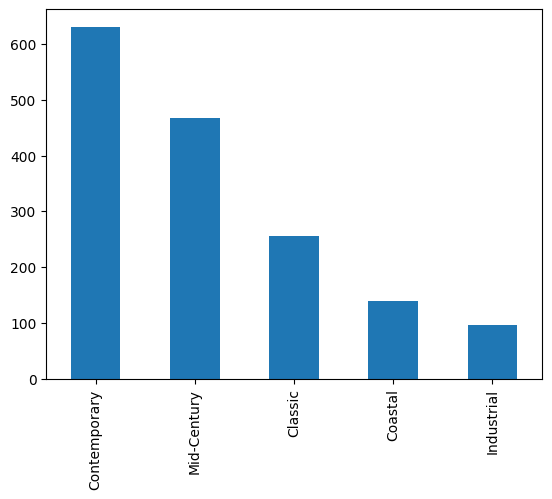

In [9]:
print(df["style"].nunique(), " different style labels in total master dataset")
print(df_filtered["style"].nunique(), " different style labels in filtered rows")
df["style"].value_counts().head(5).plot.bar()

Text(0.5, 1.0, 'Bottom 5 style labels')

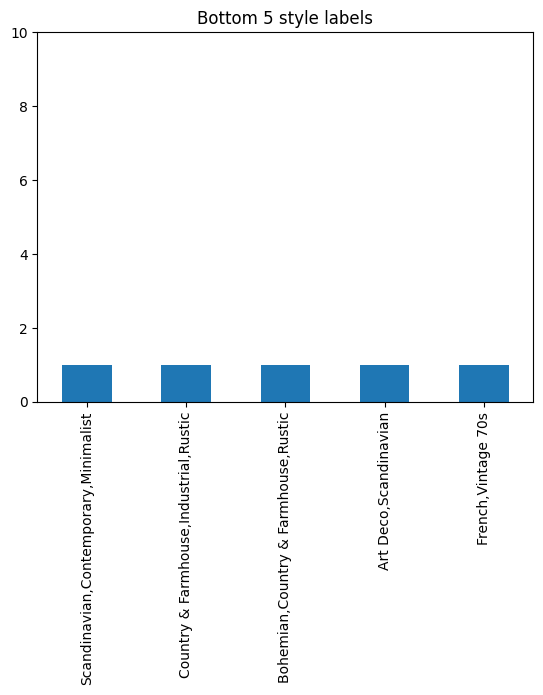

In [10]:
pl = df["style"].value_counts().tail(5).plot.bar()
pl.set_ylim(0, 10)
pl.set_title("Bottom 5 style labels")

As this EDA result shows, we have a large number of styles to categorize each funiture into. Some styles only have 1 furniture representative, which is not enough for us to train a model from the ground up. Thus, a zero-shot-classification model would make much more sense in this case.

# Train test split (Not needed for now since we are not planning for finetuning yet)

In [1]:
# from sklearn.model_selection import train_test_split

# # split the data into train and test sets
# train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

# # split the train data into train and validation sets
# train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)



# DeBERTa Zero-shot Classification Model

## Making 1 prediction

In [14]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli")
sequence_to_classify = "Product Description: Every bed needs a sidekick, and the Kids Arlo White and Gold Nightstand is up to the job. With a brushed gold metal pull and feet, it's sports plenty of metallic accents that compliment the crisp white finish. The higher sheen of the finish gives it a slightly more modern aesthetic, while the simple white color palette makes it easy to coordinate in nearly any bedroom.GREENGUARD Gold Certification. Product Feature: Brushed metal gold capped feet<br>Painted white with a higher sheen finish for modern aesthetic<br>Rounded brushed gold metal pull<br>Solid poplar and low emission engineered wood<br>Smooth metal undermount glides<br>Solid wood, 5-sided drawer boxes with dovetail joinery<br>Made in Vietnam"
style_candidate_labels = ["classic", "modern"]
output = classifier(sequence_to_classify, style_candidate_labels, multi_label=False)
print(output)


{'sequence': "Product Description: Every bed needs a sidekick, and the Kids Arlo White and Gold Nightstand is up to the job. With a brushed gold metal pull and feet, it's sports plenty of metallic accents that compliment the crisp white finish. The higher sheen of the finish gives it a slightly more modern aesthetic, while the simple white color palette makes it easy to coordinate in nearly any bedroom.GREENGUARD Gold Certification. Product Feature: Brushed metal gold capped feet<br>Painted white with a higher sheen finish for modern aesthetic<br>Rounded brushed gold metal pull<br>Solid poplar and low emission engineered wood<br>Smooth metal undermount glides<br>Solid wood, 5-sided drawer boxes with dovetail joinery<br>Made in Vietnam", 'labels': ['modern', 'classic'], 'scores': [0.989767849445343, 0.010232195258140564]}
